In [1]:
import pandas as pd
import numpy as np
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans



# Test Model & Predictions

### Clustering

In [2]:
# Import datas
data = pd.read_csv('../../data_cleaning/BankChurners.csv')

# Save Attrition columns for Probability estimation
attrition_flag = data['Attrition_Flag']

# Drop unwanted columns
data = data.drop(['Attrition_Flag','CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

# Clean datas
data = data.replace({
    'Unknown': np.nan
})

# Save columns name
columns_names = data.columns

# Select one row for testing the model
X_form = data.iloc[[42]]


In [3]:
data.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<p>Import model</p>

In [4]:
clustering_model = pickle.load(open('./model/test_models/cluster.pkl', 'rb'))
clustering_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  Index(['Gender'], dtype='object'))])),
                ('model', KMeans(init='random', n_clusters=6, n_init='auto'))])

<p>Prediction</p>

In [5]:
prediction = clustering_model.predict(X_form)
print(f"This client belongs to cluster {prediction[0]}.")

This client belongs to cluster 3.


<p>Explore model</p>

In [6]:
k_labels = clustering_model['model'].labels_
k_labels_s = pd.Series(k_labels, name = 'cluster')
k_centroids = clustering_model['model'].cluster_centers_

# tranform the data through the pipeline preprocessing: returns a df 👌
data_cleaned = clustering_model.named_steps['preprocessing'].transform(data)
# Add labels from the model
data_clustered = pd.concat([data_cleaned, k_labels_s], axis=1)
# Add classification (churning) from raw dataset
data_clustered_classified = pd.concat([data_clustered, attrition_flag], axis=1)
data_clustered_classified.head()



,numeric__Customer_Age,numeric__Dependent_count,numeric__Months_on_book,numeric__Total_Relationship_Count,numeric__Months_Inactive_12_mon,numeric__Contacts_Count_12_mon,numeric__Credit_Limit,numeric__Total_Revolving_Bal,numeric__Total_Amt_Chng_Q4_Q1,numeric__Total_Trans_Amt,numeric__Total_Trans_Ct,numeric__Total_Ct_Chng_Q4_Q1,numeric__Avg_Utilization_Ratio,categorical__Gender_F,categorical__Gender_M,cluster,Attrition_Flag
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,2.623494,-0.959707,-0.973895,3.834003,-0.775882,0.0,1.0,4,Existing Customer
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,3.563293,-0.916433,-1.357340,12.608573,-0.616276,1.0,0.0,4,Existing Customer
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,8.367214,-0.740982,-1.911206,6.807864,-0.997155,0.0,1.0,4,Existing Customer
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,2.942843,-0.951758,-1.911206,6.807864,1.759686,1.0,0.0,5,Existing Customer
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,6.455682,-1.056263,-1.570365,7.509325,-0.997155,0.0,1.0,4,Existing Customer


## Model metrics

scaled datas from model

In [8]:
pca = PCA()
pca.fit(data_scaled)

# Show how much variance is explained by each of the individual features
pca.explained_variance_ratio_
# len(pca.explained_variance_ratio_)

NameError: name 'data_scaled' is not defined

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--', color = 'blue')
plt.title('Explained Variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained Variance')
plt.show()
# plt.close()

In [ ]:
# From the Variance by components graph, I choose to select 22 components to preserve at least 95% of the information.

pca_reduced = PCA(n_components = 22)
pca_reduced.fit(data_scaled_df)
pca_reduced.get_feature_names_out

# We need only the calculated resulting components scores for the elements in our data set:

data_pca = pca_reduced.transform(data_scaled_df)

In [ ]:
# Optimal k
# Elbow & Silhouette Score 
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import pyplot as plt

# WSS error is the Within-cluster sum of squared error

wss = []
silhouette_avg = []
#deciding k range-here the dataset has few rows thats why i am taking k range (1,10)
k_rng = range(2,10)
#perform iterations
for k in k_rng:
    kmeans = KMeans(n_clusters=k, init='random', n_init="auto") # 10 iteration, returns best result for inertia
    kmeans.fit(data_pca)
    cluster_labels = kmeans.labels_
    
    # Elbow
    wss.append(kmeans.inertia_)
    
    # Silhouette
    silhouette_scr = silhouette_score(data_pca, cluster_labels)
    # print(f"For n_clusters = {k}\nThe average silhouette_score is :{silhouette_scr}")
    silhouette_avg.append(silhouette_scr)


# plt.title('WSS error vs K values\n Pick k where it will result in no more significant decrease of WSS')
# plt.xlabel('K')
# plt.ylabel('Within-cluster sum of squared error')

COLOR_WSS = "#69b3a2"
COLOR_SILHOUETTE = "#3399e6"
fig, ax1 = plt.subplots(figsize=(8, 8))
# second y axis
ax2 = ax1.twinx()

ax1.plot(k_rng, wss, color=COLOR_WSS, lw=3)
ax2.plot(k_rng, silhouette_avg, color=COLOR_SILHOUETTE, lw=4)

ax1.set_xlabel("K")
ax1.set_ylabel("WSS", color=COLOR_WSS, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_WSS)

ax2.set_ylabel("Silhouette", color=COLOR_SILHOUETTE, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_SILHOUETTE)

fig.suptitle("WSS error, Silhouette score vs K values,\n Pick k where it results in no more significant decrease of WSS,\nAnd where Silhouette is max", fontsize=15)
plt.show()
plt.close()




## Centroids Analysis

In [ ]:
centroids = pd.DataFrame(k_centroids, columns = data_cleaned.columns)
centroids.head()

,numeric__Customer_Age,numeric__Dependent_count,numeric__Months_on_book,numeric__Total_Relationship_Count,numeric__Months_Inactive_12_mon,numeric__Contacts_Count_12_mon,numeric__Credit_Limit,numeric__Total_Revolving_Bal,numeric__Avg_Open_To_Buy,numeric__Total_Amt_Chng_Q4_Q1,...,categorical__Marital_Status_Single,categorical__Income_Category_$120K +,categorical__Income_Category_$40K - $60K,categorical__Income_Category_$60K - $80K,categorical__Income_Category_$80K - $120K,categorical__Income_Category_Less than $40K,categorical__Card_Category_Blue,categorical__Card_Category_Gold,categorical__Card_Category_Platinum,categorical__Card_Category_Silver
0,1.272741,-0.876987,1.162733,0.346038,0.046328,0.128646,-0.339801,0.301930,-0.366798,0.004111,...,0.354193,0.056946,0.207134,0.140175,0.130163,0.465582,0.981227,0.000626,-8.673617e-19,0.018148
1,-0.024998,0.469866,-0.038518,-0.061792,-0.001327,-0.255389,-0.573563,0.628252,-0.629766,-0.126747,...,0.387484,0.019478,0.196850,0.069623,0.057605,0.656444,0.995441,0.000414,9.540979e-18,0.004144
2,-0.129727,-0.023035,-0.104229,-1.039893,-0.119652,-0.252139,0.548582,0.295968,0.521933,0.067836,...,0.399791,0.081420,0.192067,0.179541,0.191023,0.355950,0.796451,0.037578,8.350731e-03,0.157620
3,-0.029877,0.290569,-0.008366,-0.028630,0.161284,0.115917,-0.320396,-1.094692,-0.222188,-0.291637,...,0.391937,0.044888,0.187864,0.145885,0.113466,0.507897,0.974231,0.003325,8.312552e-04,0.021613
4,0.050158,0.200068,0.046229,0.038097,-0.027743,0.061115,2.038123,0.017640,2.036114,-0.029807,...,0.414141,0.264180,0.032634,0.194250,0.421911,0.087024,0.717172,0.051282,7.770008e-03,0.223776


In [ ]:

def UnscaleCentroids(centroids: pd.DataFrame, original_df: pd.DataFrame) -> pd.DataFrame:

    # Select numerical and categorical columns
    centroids_numerical = centroids.loc[:, centroids.columns.str.startswith('numeric__')]
    centroids_categorical = centroids.loc[:, centroids.columns.str.startswith('categorical__')]
    # Save columns names
    numerical_columns = original_df.select_dtypes(include=['number']).columns 
    categorical_columns = original_df.select_dtypes(exclude=['number']).columns
    # Inverse numerical and categorical
    numerical_inverse = clustering_model.steps[0][1].named_transformers_['numeric']['scaler'].inverse_transform(centroids_numerical)
    categorical_inverse = clustering_model.steps[0][1].named_transformers_['categorical']['encoder'].inverse_transform(centroids_categorical)
    # Build df for num and cat, with original column names
    numerical_inverse = pd.DataFrame(numerical_inverse, columns = numerical_columns)
    categorical_inverse = pd.DataFrame(categorical_inverse, columns = categorical_columns)
    # Concat to centroids_inverse df
    centroids_inverse = pd.concat([numerical_inverse, categorical_inverse], axis=1)
    return centroids_inverse


centroids_inverse = UnscaleCentroids(centroids, data)



In [ ]:
columns_order = ['Total_Amt_Chng_Q4_Q1','Dependent_count','Total_Relationship_Count','Total_Ct_Chng_Q4_Q1','Contacts_Count_12_mon','Months_Inactive_12_mon','Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct','Avg_Utilization_Ratio']

def sortCentroids(df: pd.DataFrame, order: list) -> pd.DataFrame:
    return df[order]

centroids_profile = sortCentroids(centroids_inverse, columns_order)
centroids_profile

,Total_Amt_Chng_Q4_Q1,Dependent_count,Total_Relationship_Count,Total_Ct_Chng_Q4_Q1,Contacts_Count_12_mon,Months_Inactive_12_mon,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,0.760842,1.207134,4.350438,0.702071,2.597622,2.387985,1408.871089,2849.543805,52.627660,0.358340
1,0.732158,2.956486,3.716535,0.739441,2.172814,2.339826,1674.806051,4156.761707,70.470369,0.571757
2,0.774810,2.316284,2.196242,0.732351,2.176409,2.220251,1404.012526,13235.079332,106.224426,0.174919
3,0.696015,2.723608,3.768080,0.640145,2.583541,2.504156,270.697839,3415.415628,58.989609,0.044448
4,0.753407,2.606061,3.871795,0.701610,2.522922,2.313131,1177.189588,3711.618493,60.175602,0.046775
5,0.905721,1.754949,4.462116,0.792998,2.677816,2.128328,1345.903754,2964.365870,55.660068,0.339152


In [ ]:
probability = data_clustered_classified.groupby('cluster')['Attrition_Flag'].value_counts(normalize=True).mul(100).round(2)
# probability.unstack(level=-1).plot.barh()
probability.astype(str) + '%'

# sns.histplot(probability, x='cluster', hue='Attrition_Flag', multiple='fill')
# probability.head()

cluster  Attrition_Flag   
0        Existing Customer    86.42%
         Attrited Customer    13.58%
1        Existing Customer    91.76%
         Attrited Customer     8.24%
2        Existing Customer    98.54%
         Attrited Customer     1.46%
3        Existing Customer    64.46%
         Attrited Customer    35.54%
4        Existing Customer    84.07%
         Attrited Customer    15.93%
5        Existing Customer    90.63%
         Attrited Customer     9.37%
Name: Attrition_Flag, dtype: object

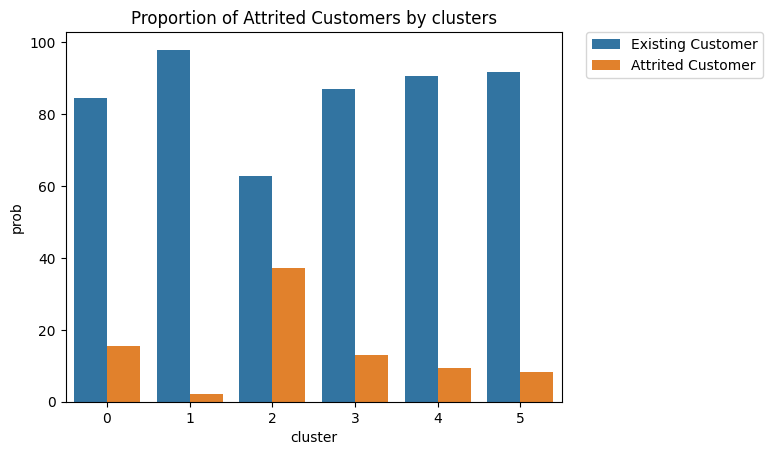

In [15]:
# f, axes = plt.subplots(1,2)
proba_df = (data_clustered_classified.groupby('cluster')['Attrition_Flag'].value_counts(normalize=True).mul(100).round(2).rename('prob').reset_index())
proba_df
cluster_proportion = sns.barplot(x='cluster',y='prob', hue='Attrition_Flag', data=proba_df)
# sns.barplot(x='cluster',y='prob', hue='Attrition_Flag', stat="proba", multiple="fill", data=proba_df, ax=axes[1])
cluster_proportion.set_title('Proportion of Attrited Customers by clusters')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
plt.close()

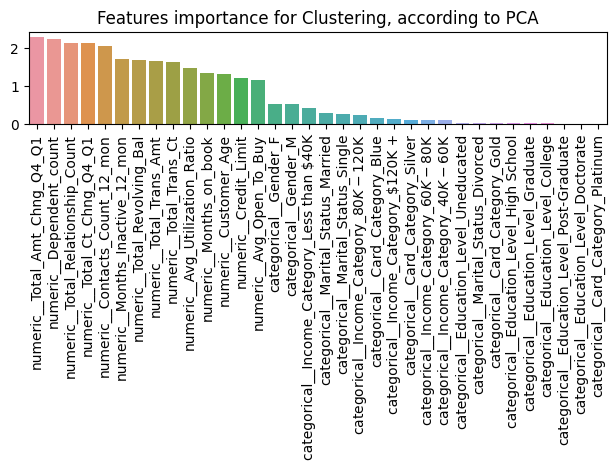

['numeric__Total_Amt_Chng_Q4_Q1', 'numeric__Dependent_count', 'numeric__Total_Relationship_Count', 'numeric__Total_Ct_Chng_Q4_Q1', 'numeric__Contacts_Count_12_mon', 'numeric__Months_Inactive_12_mon', 'numeric__Total_Revolving_Bal', 'numeric__Total_Trans_Amt', 'numeric__Total_Trans_Ct', 'numeric__Avg_Utilization_Ratio', 'numeric__Months_on_book', 'numeric__Customer_Age', 'numeric__Credit_Limit', 'numeric__Avg_Open_To_Buy', 'categorical__Gender_F', 'categorical__Gender_M', 'categorical__Income_Category_Less than $40K', 'categorical__Marital_Status_Married', 'categorical__Marital_Status_Single', 'categorical__Income_Category_$80K - $120K', 'categorical__Card_Category_Blue', 'categorical__Income_Category_$120K +', 'categorical__Card_Category_Silver', 'categorical__Income_Category_$60K - $80K', 'categorical__Income_Category_$40K - $60K', 'categorical__Education_Level_Uneducated', 'categorical__Marital_Status_Divorced', 'categorical__Card_Category_Gold', 'categorical__Education_Level_High Sc

In [ ]:
# PCA Analysis: sort features by importance, used to compile pca components.

pca = PCA(n_components=10)
pca.fit_transform(data_cleaned)
pca_df = pd.DataFrame(pca.components_, columns=data_cleaned.columns)
pca_df = abs(pca_df)
pca_df = pd.DataFrame(pca_df.sum(axis=0).values.reshape(1, -1), columns=data_cleaned.columns)

# create a list of tuples containing the column names and their corresponding values in the first row
cols_and_vals = [(col, pca_df.iloc[0][col]) for col in pca_df.columns]

# sort the list of tuples based on the values in the first row
cols_sorted = sorted(cols_and_vals, key=lambda x: x[1], reverse=True)

# create a list of the sorted column names
cols_sorted_names = [x[0] for x in cols_sorted]

# reorder the dataframe based on the sorted column names
pca_sorted_df = abs(pca_df[cols_sorted_names])
sns.barplot(data = pca_sorted_df)
plt.title('Features importance for Clustering, according to PCA')
plt.xticks(rotation=90)
plt.tight_layout(w_pad=2)
plt.show()
plt.close()
# print(pca_sorted_df)

print(cols_sorted_names)

c:\Users\test\Desktop\Churn_Prediction_Becode\venv\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


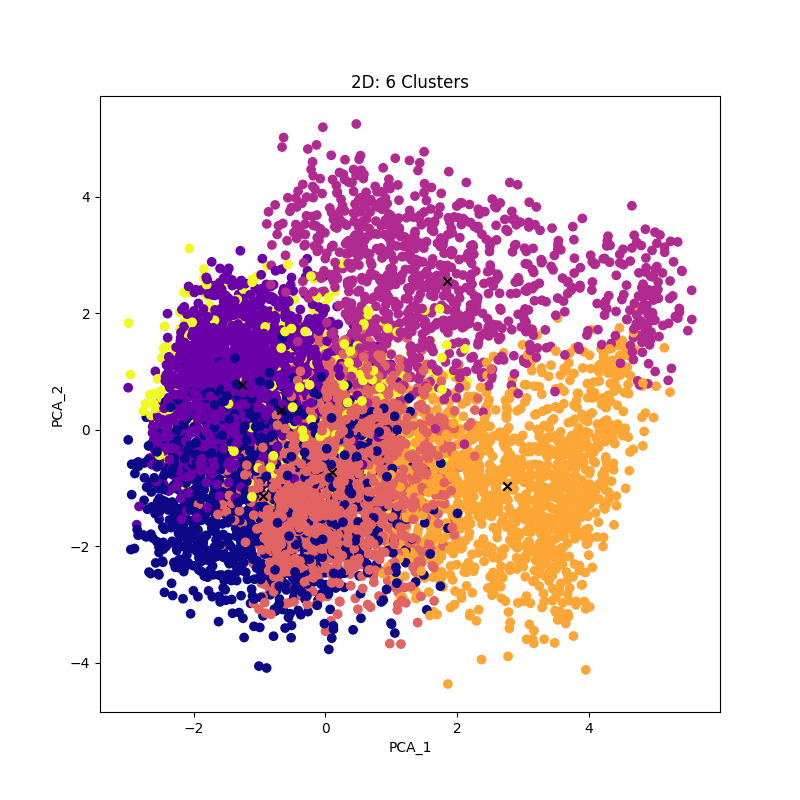

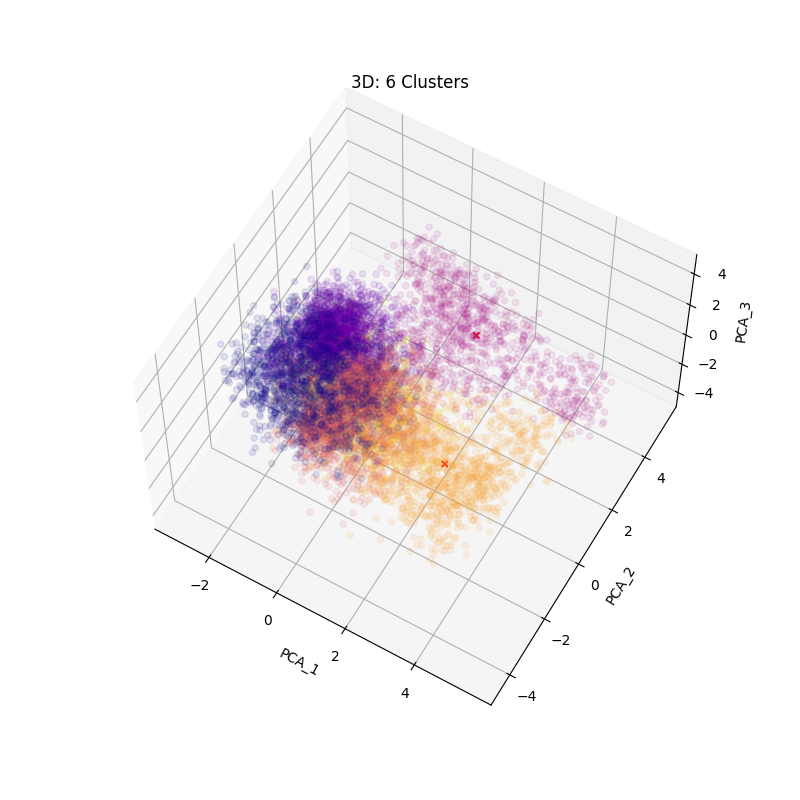

In [ ]:
%matplotlib widget
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d    

def plot_clusters(data, labels, centroids):
    pca = PCA(n_components=3)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids) # do not use fit to avoid fitting again and having centroids offsets
    
    # 2D scatter plot with PCA_1 and PCA_2
    fig0 = plt.figure(figsize=(8, 8))
    ax0 = plt.axes()
    ax0.set_title(f"2D: {len(centroids)} Clusters")
    ax0.set_xlabel('PCA_1')
    ax0.set_ylabel('PCA_2')
    ax0.scatter(x=data_2d[:,0], y= data_2d[:,1], c=labels, cmap='plasma')
    ax0.scatter(x=centroids_2d[:,0], y= centroids_2d[:,1], marker='x', c="black")
    plt.show()
    plt.close()
    
    # 3D scatter plot with PCA_1, PCA_2 and PCA_3
    fig = plt.figure(figsize=[8,8])
    fig.canvas.toolbar.visible = True
    ax = plt.axes(projection='3d')
    ax.set_title(f"3D: {len(centroids)} Clusters")
    ax.set_xlabel('PCA_1')
    ax.set_ylabel('PCA_2')
    ax.set_zlabel('PCA_3')
    # datas
    xdata = data_2d[:,0]
    ydata = data_2d[:,1]
    zdata = data_2d[:,2]
    # centoids
    xctr = centroids_2d[:,0]
    yctr = centroids_2d[:,1]
    zctr = centroids_2d[:,2]
    # Plot datasets
    ax.scatter3D(xdata, ydata, zdata, c=labels, alpha=0.1, cmap='plasma')
    # Plots centroids
    ax.scatter3D(xctr, yctr, zctr, c='red', alpha=1, marker='x')
    # Set Default view
    ax.elev = 60
    # ax.dist = 
    # ax.azim = 
    plt.show()
    plt.close()


# kmeans.labels_
plot_clusters(data_cleaned, k_labels_s, k_centroids)

### Classification

<p>Import model</p>

In [ ]:
classification_model = pickle.load(open('./model/classification/classification_model.pkl', 'rb'))
classification_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Gender'])])),
                ('model', KNeighborsClassifier(n_neighbors=9))])

In [ ]:
data_classification = pd.read_csv('../data_cleaning/BankChurners.csv')
# Select columns
select= ['Attrition_Flag','Gender', 'Customer_Age', 'Dependent_count', 
        'Months_on_book', 'Total_Relationship_Count', 
        'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 
        'Credit_Limit', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 
        'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 
        'Avg_Utilization_Ratio'
        ]
data_classification = pd.concat([data_classification[select]], axis=1)

# Select features
features = data_classification.drop(['Attrition_Flag'], axis=1)

# Select target
target = data_classification['Attrition_Flag']

def prediction_test(df: pd.DataFrame, model):
        clt_num = np.random.randint(df.shape[0])
        
        client = data_classification.iloc[[clt_num]]
        client_status = client['Attrition_Flag'].iloc[0]
        print(type(client_status))
        client_features = client.drop(['Attrition_Flag'],axis=1)
        result = model.predict(client_features)[0]
        if result == client_status:
                flag = '👍'
        else: 
                flag = '👎'
        print(f"Prediction: {result}, Actual status: {client_status}, {flag}!")


prediction_test(data_classification, classification_model)

<class 'str'>
Prediction: Attrited Customer, Actual status: Attrited Customer, 👍!


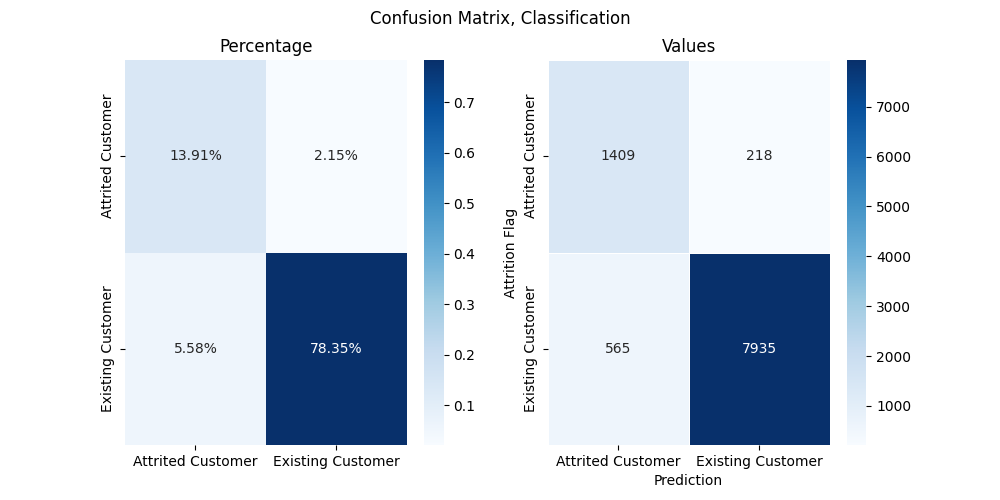

In [ ]:

pred = classification_model.predict(features)
target_names = ['Attrited Customer','Existing Customer']
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target, pred, labels=target_names)

#cm vizualization
import seaborn as sns 
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

x_axis_labels = ['Attrited Customer','Existing Customer'] # labels for x-axis
y_axis_labels = ['Attrited Customer','Existing Customer'] # labels for y-axis
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%',cmap='Blues',xticklabels=target_names, yticklabels=target_names, ax=ax1)
sns.heatmap(cm,annot = True,cmap='Blues',xticklabels=target_names, yticklabels=target_names, linewidths= 0.5, fmt=".0f", ax=ax2)
plt.xlabel('Prediction')
plt.ylabel('Attrition Flag')
ax1.set_title('Percentage')
ax2.set_title('Values')
plt.suptitle('Confusion Matrix, Classification')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(target, pred, target_names=target_names))

                   precision    recall  f1-score   support

Attrited Customer       0.71      0.87      0.78      1627
Existing Customer       0.97      0.93      0.95      8500

         accuracy                           0.92     10127
        macro avg       0.84      0.90      0.87     10127
     weighted avg       0.93      0.92      0.93     10127



In [34]:
# classification_model['model'].predict_proba(features)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Avg_Utilization_Ratio
- Contacts_Count_12_mon
- Credit_Limit
- Customer_Age
- Dependent_count
- ...
Feature names seen at fit time, yet now missing:
- categorical__Gender_F
- categorical__Gender_M
- numeric__Avg_Utilization_Ratio
- numeric__Contacts_Count_12_mon
- numeric__Credit_Limit
- ...
